# Inertia equation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from inertia_particle import euler_maruyama
from scipy.optimize import curve_fit

In [2]:
# Paramètres de la simulation
step = 10000 # Nombre de pas de temps
dt = 0.01 # Pas de temps
T = step*dt # Temps total de simulation
gamma = 0.1 # Coefficient de friction
D = 1.0 # Coefficient de diffusion
x0 = 0.0 # Position initiale
v0 = 0.0 # Vitesse initiale
# Simulation du mouvement brownien
T = step*dt # Temps total de simulation
n_walks = 2001 # Nombre de trajectoires à simuler
x0 = np.zeros((n_walks,)) # Position initiale
t = np.arange(0, T, dt)

In [3]:

x, v = euler_maruyama(D, gamma, T, dt, x0=x0)

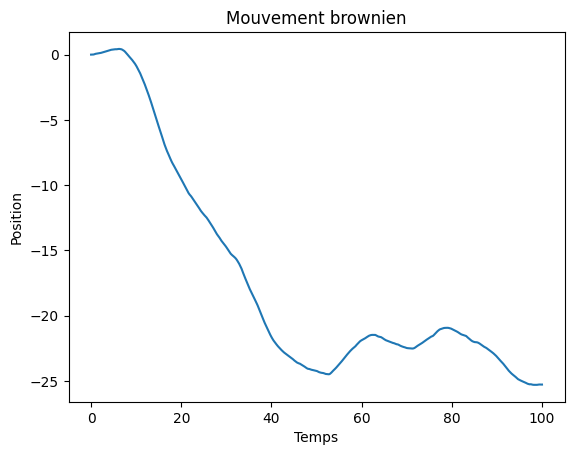

In [4]:
plt.plot(t, x[:, 2])
plt.xlabel('Temps')
plt.ylabel('Position')
plt.title('Mouvement brownien')
plt.show()

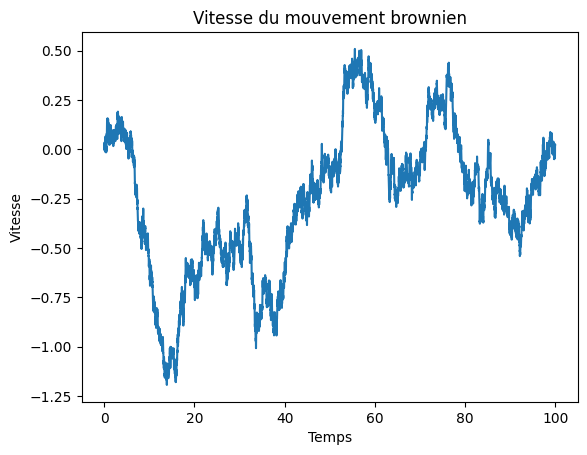

In [5]:
plt.plot(t, v[:, 2])
plt.xlabel('Temps')
plt.ylabel('Vitesse')
plt.title('Vitesse du mouvement brownien')
plt.show()

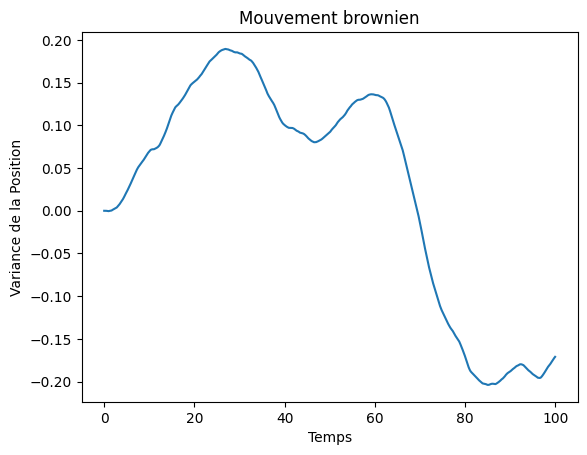

In [6]:
plt.plot(t, x.mean(axis=1))
plt.xlabel('Temps')
plt.ylabel('Variance de la Position')
plt.title('Mouvement brownien')
plt.show()

Mesure de l'effet de D sur cette équation. 

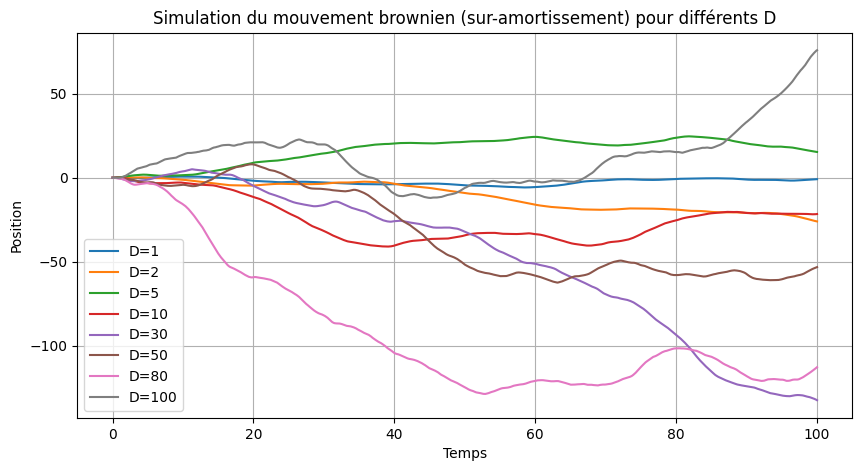

In [7]:
D = [1,2,5,10, 30, 50, 80, 100]
x = np.zeros((len(D), step, n_walks))
v = np.zeros((len(D), step, n_walks))
x0 = np.zeros((n_walks,))
for i, d in enumerate(D):
    x[i], v[i] = euler_maruyama(d, gamma, T, dt, x0=x0)

# Tracé de la trajectoire
plt.figure(figsize=(10, 5))
for i, d in enumerate(D):
    plt.plot(t, x[i, :, 0], label='D={}'.format(d))
plt.xlabel('Temps')
plt.ylabel('Position')
plt.title('Simulation du mouvement brownien (sur-amortissement) pour différents D')
plt.legend()
plt.grid()
plt.show()

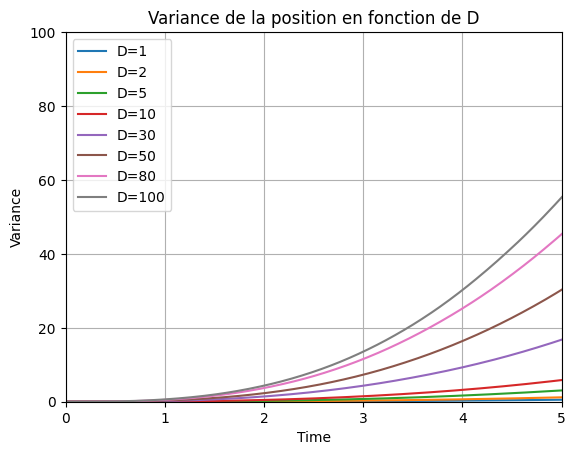

In [8]:
plt.plot(t, x.var(2).T, label=[f"D={d}" for d in D])
plt.xlabel("Time")
plt.ylabel("Variance")
plt.title("Variance de la position en fonction de D")
plt.grid()
plt.legend()
plt.ylim(0, 100)
plt.xlim(0,5)
plt.show()

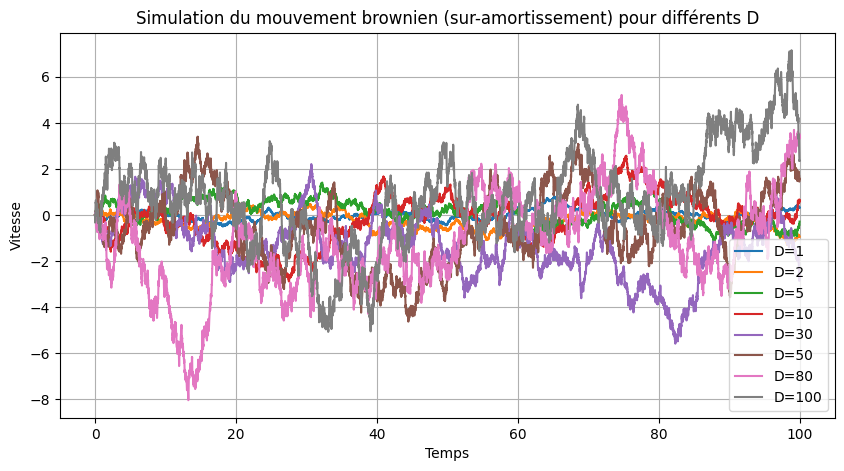

In [9]:
plt.figure(figsize=(10, 5))
for i, d in enumerate(D):
    plt.plot(t, v[i, :, 0], label='D={}'.format(d))
plt.xlabel('Temps')
plt.ylabel('Vitesse')
plt.title('Simulation du mouvement brownien (sur-amortissement) pour différents D')
plt.legend()
plt.grid()
plt.show()

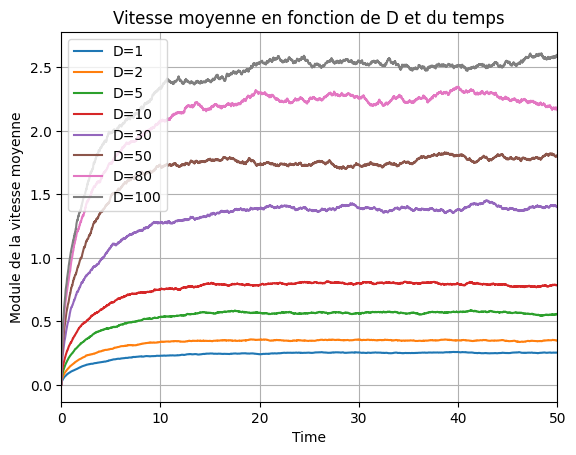

In [10]:
plt.plot(t, np.abs(v).mean(2).T, label=[f"D={d}" for d in D])
plt.xlabel("Time")
plt.ylabel("Module de la vitesse moyenne")
plt.title("Vitesse moyenne en fonction de D et du temps")
plt.grid()
plt.legend()
#plt.ylim(0, 100)
plt.xlim(0,50)
plt.show()

## Loi de maxwell-Boltzmann

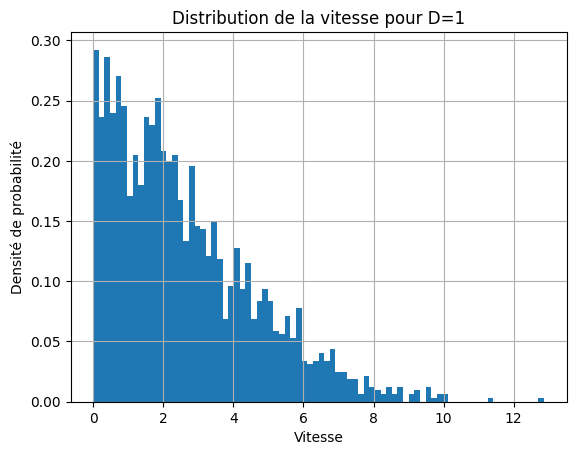

In [11]:
plt.hist(np.abs(v[7, 5000, :]), bins=80, density=True)
plt.xlabel('Vitesse')
plt.ylabel('Densité de probabilité')
plt.title('Distribution de la vitesse pour D={}'.format(D[0]))
plt.grid()
plt.show() 